In [427]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib import colors
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn import model_selection
from sklearn.inspection import DecisionBoundaryDisplay
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

# 探索make_blobs:方便的数据生成器

In [428]:
# fuction类型，参数有n_samples,n_features,centers,cluster_std,center_box,shuffle,random_state,return_centers
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [581]:
# 比较常用的n_samples, n_features, centers, random_state
# 尝试生成一个
data = make_blobs(n_samples=100, n_features=2)
data

(array([[ 4.34156581,  3.56523481],
        [ 5.43703728,  4.14712536],
        [-2.05677067, -4.20770665],
        [10.48306221,  5.29826569],
        [ 9.24307919,  4.6222825 ],
        [ 3.65754294,  2.49472896],
        [ 8.85279273,  5.37304833],
        [ 5.03070452,  5.0180083 ],
        [ 4.07911222,  3.31095185],
        [ 5.13005011,  4.7117797 ],
        [-0.78448482, -3.37401748],
        [-0.82012658, -3.88553754],
        [ 3.67368284,  4.13364375],
        [ 0.9343314 , -2.82254671],
        [ 2.68715458,  2.08528316],
        [-0.1657041 , -4.99543501],
        [-1.34187957, -3.34618693],
        [ 2.63512985,  3.23128363],
        [ 5.26050898,  3.81805849],
        [ 9.49427651,  5.71938604],
        [ 3.55488648,  4.08117149],
        [-0.55973385, -3.34995533],
        [-1.80143795, -4.38243713],
        [-0.46874238, -4.56497575],
        [ 5.49953303,  3.54772511],
        [-2.44879733, -4.05373221],
        [ 4.768406  ,  4.36012362],
        [ 4.19911905,  3.618

In [430]:
# 生成的是tuple类型的数据，一个tuple里有两个数组
# data[0]是坐标，data[1]是值
data[0]

array([[-5.21122852e+00,  6.86158309e-01],
       [-3.26315067e+00,  2.44193271e+00],
       [-2.95223693e+00,  1.82148238e+00],
       [ 1.13926688e+00,  8.52595392e-01],
       [ 4.86739213e-03,  8.92365705e-01],
       [-5.08694241e+00,  3.44163225e-02],
       [-5.72321605e+00,  3.01516343e+00],
       [-5.57343121e-02, -5.39605993e+00],
       [-3.06151325e+00,  1.72512141e+00],
       [-3.70472548e+00,  9.36939264e-01],
       [-3.67893764e+00,  2.40217585e+00],
       [-3.24556641e+00,  1.60466242e+00],
       [-2.93182875e+00,  9.46070276e-01],
       [ 1.40749688e+00, -7.56182705e+00],
       [ 1.26188223e+00, -4.55393575e+00],
       [ 1.31774542e+00,  2.88691442e-01],
       [ 6.57064808e-01,  1.72127886e+00],
       [ 1.11873223e+00,  1.25159244e+00],
       [-6.01732984e-01, -1.63278517e-01],
       [ 1.98459665e+00, -5.31352719e+00],
       [-2.79388233e-01, -4.02285454e-01],
       [ 1.61220264e+00,  6.96535572e-01],
       [ 2.61295675e-01, -6.38663763e+00],
       [ 1.

In [431]:
data[1]

array([0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2,
       1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1,
       0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2])

# 二中心数据的SVM分类

In [432]:
X, y = make_blobs(n_samples=66, centers=2)

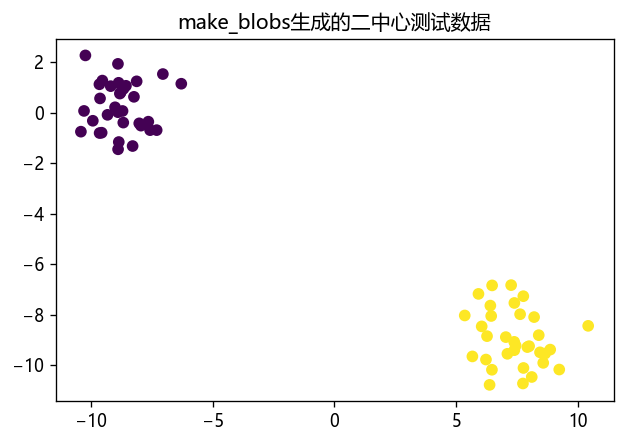

In [433]:
plt.figure(1,dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("make_blobs生成的二中心测试数据")
plt.show()

In [434]:
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

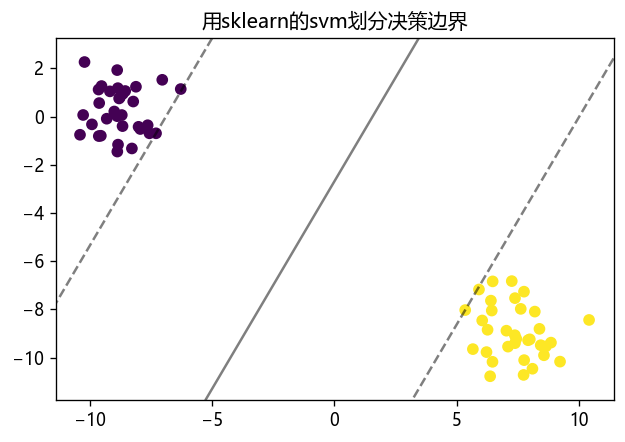

In [435]:
plt.figure(2,dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("用sklearn的svm划分决策边界")
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
plt.show()

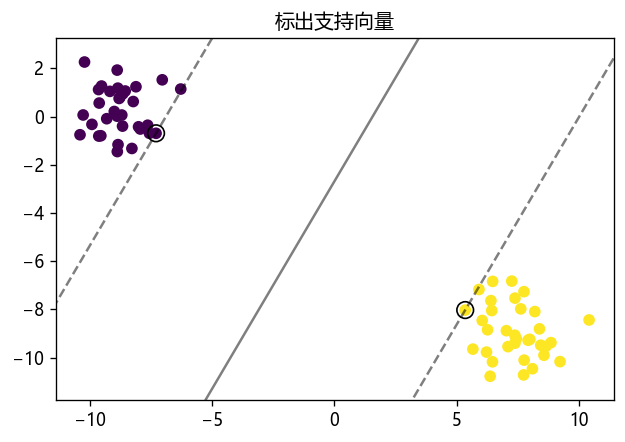

In [436]:
plt.figure(3,dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("标出支持向量")
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# 尝试三中心是否可以通过SVM划分

In [437]:
X, y = make_blobs(n_samples=99, centers=3)

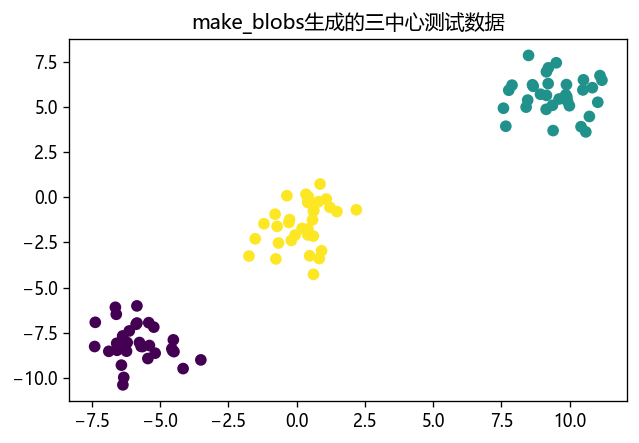

In [438]:
plt.figure(1,dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("make_blobs生成的三中心测试数据")
plt.show()

In [439]:
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

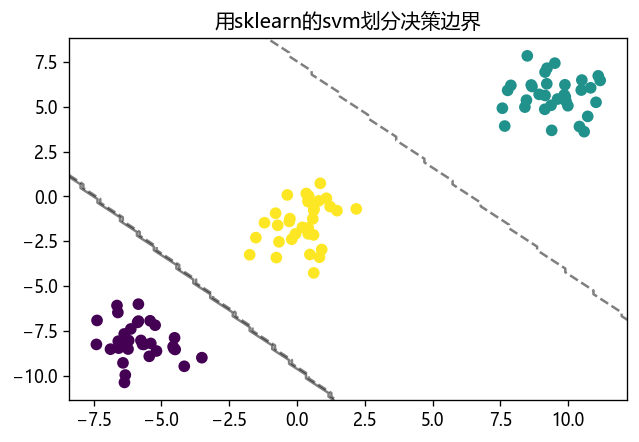

In [440]:
plt.figure(2,dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("用sklearn的svm划分决策边界")
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
plt.show()

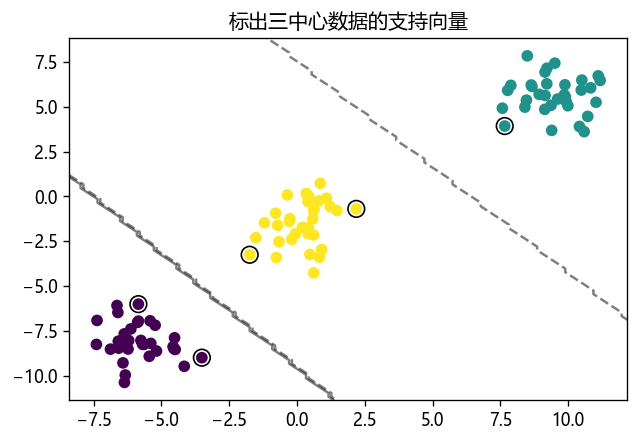

In [441]:
plt.figure(3,dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("标出三中心数据的支持向量")
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# 尝试对鸢尾花数据集寻找sv支持向量

## 以萼片长度和萼片宽度作为两个特征

In [442]:
# 因为鸢尾花的数据算简单易懂的嘿嘿
# 读取数据
iris = pd.read_csv('../matplotlib learn/data/iris.csv')

In [443]:
# 读取前几个数据
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [444]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


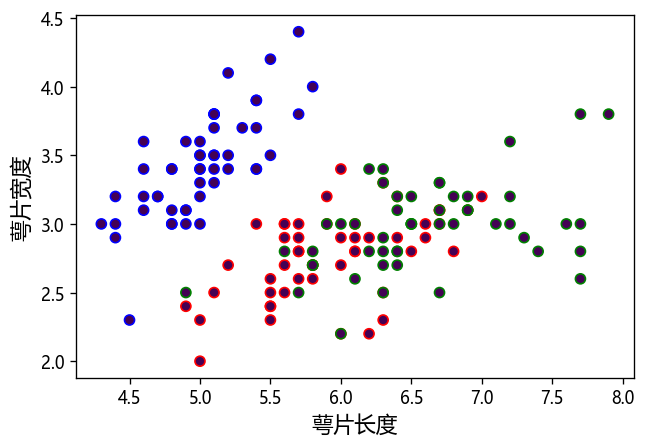

In [445]:
# 画三个中心的数据的散点图
x1 = iris[iris['Species'] == 'setosa']['Sepal.Length']
y1 = iris[iris['Species'] == 'setosa']['Sepal.Width']
x2 = iris[iris['Species'] == 'versicolor']['Sepal.Length']
y2 = iris[iris['Species'] == 'versicolor']['Sepal.Width']
x3 = iris[iris['Species'] == 'virginica']['Sepal.Length']
y3 = iris[iris['Species'] == 'virginica']['Sepal.Width']
z1 = np.zeros(50,int)
z2 = np.ones(50,int)
z3 = 2*z2
plt.figure(1,dpi=120)
plt.scatter(x1, y1, c=z1, edgecolor='b')
plt.scatter(x2, y2, c=z2, edgecolor='r')
plt.scatter(x3, y3, c=z3, edgecolor='g')
plt.xlabel("萼片长度", fontsize=13)
plt.ylabel("萼片宽度", fontsize=13)
plt.show()

In [446]:
# 将两个特征合并成二维数组
X1 = np.column_stack((x1, y1))  # 水平合并
X2 = np.column_stack((x2, y2))
X3 = np.column_stack((x3, y3))
X = np.concatenate((X1, X2, X3), axis = 0)  # 垂直合并

z = [z1,z2,z3]
tmp = tuple(z)
y = np.hstack(z)

In [447]:
# 定义分类器
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

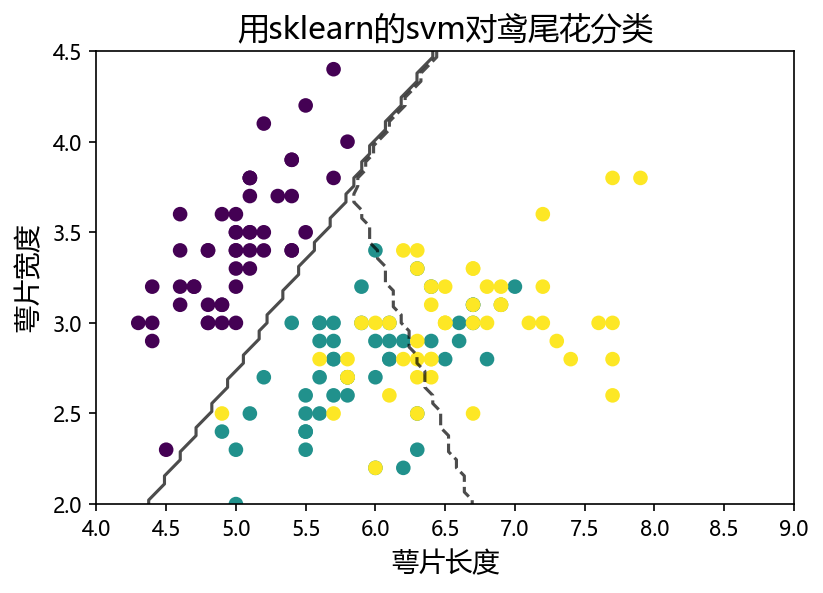

In [448]:
plt.figure(2,dpi=150)
plt.scatter(X[:, 0], X[:, 1], c=y,label="1")
plt.title("用sklearn的svm对鸢尾花分类", fontsize=15)
plt.xlabel("萼片长度", fontsize=13)
plt.ylabel("萼片宽度", fontsize=13)
ax = plt.gca()
ax.set_xlim(4.0,9.0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(2.0,4.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.7,
    linestyles=["--", "-", "--"],
    ax=ax,
)


plt.show()

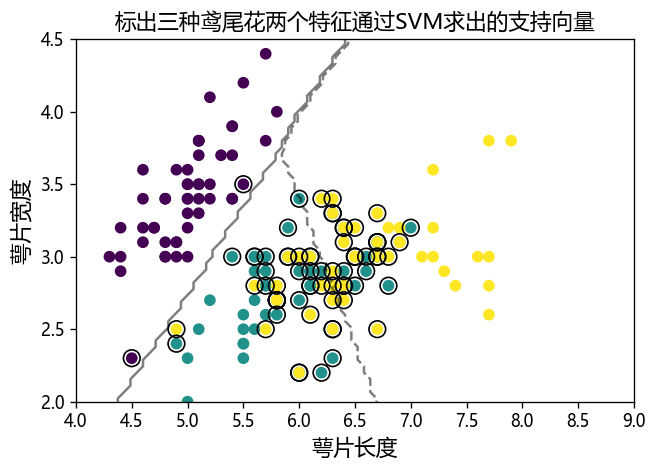

In [449]:
plt.figure(3,dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("标出三种鸢尾花两个特征通过SVM求出的支持向量", fontsize=13)
plt.xlabel("萼片长度", fontsize=13)
plt.ylabel("萼片宽度", fontsize=13)
ax = plt.gca()
ax.set_xlim(4.0,9.0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(2.0,4.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

## 以花瓣长度和花瓣宽度作为两个特征

In [450]:
# 读取数据
iris = pd.read_csv('../matplotlib learn/data/iris.csv')

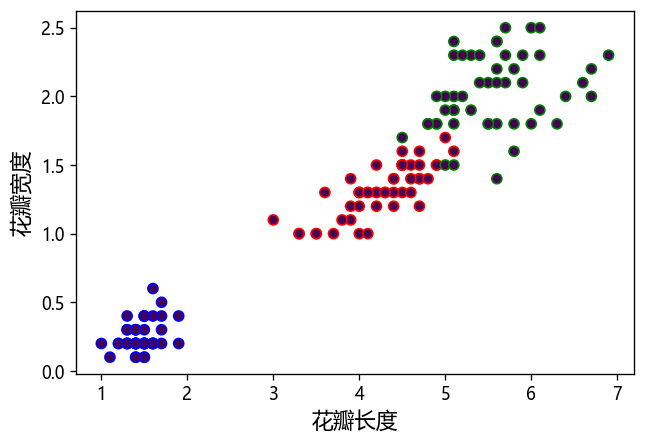

In [451]:
# 画三个中心的数据的散点图
x1 = iris[iris['Species'] == 'setosa']['Petal.Length']
y1 = iris[iris['Species'] == 'setosa']['Petal.Width']
x2 = iris[iris['Species'] == 'versicolor']['Petal.Length']
y2 = iris[iris['Species'] == 'versicolor']['Petal.Width']
x3 = iris[iris['Species'] == 'virginica']['Petal.Length']
y3 = iris[iris['Species'] == 'virginica']['Petal.Width']
y = np.zeros(50,int)
plt.figure(1,dpi=120)
plt.scatter(x1, y1, c=y, edgecolor='b')
plt.scatter(x2, y2, c=y, edgecolor='r')
plt.scatter(x3, y3, c=y, edgecolor='g')
plt.xlabel("花瓣长度", fontsize=13)
plt.ylabel("花瓣宽度", fontsize=13)
plt.show()

# 感觉

In [452]:
# 将两个特征合并成二维数组
X1 = np.column_stack((x1, y1))
X2 = np.column_stack((x2, y2))
X3 = np.column_stack((x3, y3))
X = np.concatenate((X1, X2, X3), axis = 0)

z = [z1,z2,z3]
tmp = tuple(z)
y = np.hstack(z)

In [453]:
# 定义分类器
clf_2 = svm.SVC(kernel="linear", C=0.5)
clf_2.fit(X, y)

SVC(C=0.5, kernel='linear')

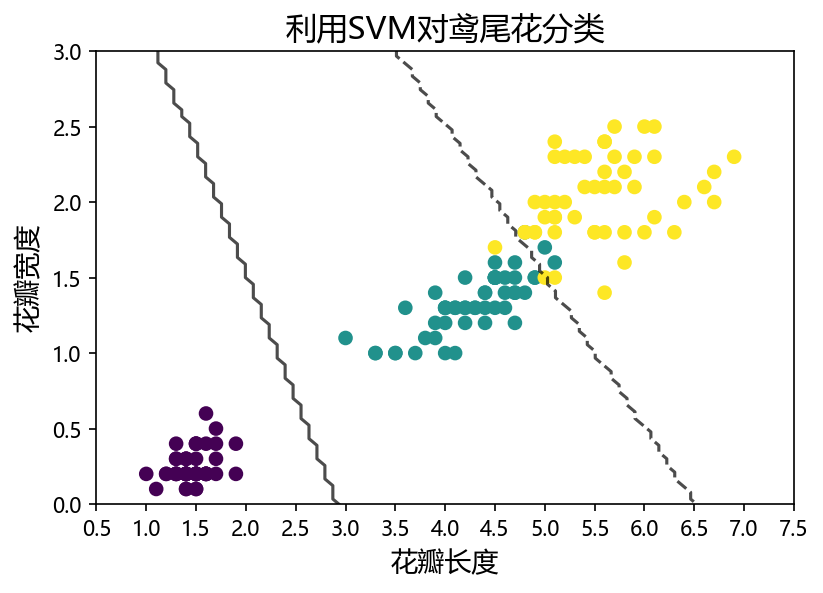

In [454]:
plt.figure(2,dpi=150)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("利用SVM对鸢尾花分类", fontsize=15)
plt.xlabel("花瓣长度", fontsize=13)
plt.ylabel("花瓣宽度", fontsize=13)
ax = plt.gca()
ax.set_xlim(0.5,7.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0,3.0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
DecisionBoundaryDisplay.from_estimator(
    clf_2,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.7,
    linestyles=["--", "-", "--"],
    ax=ax,
)


plt.show()

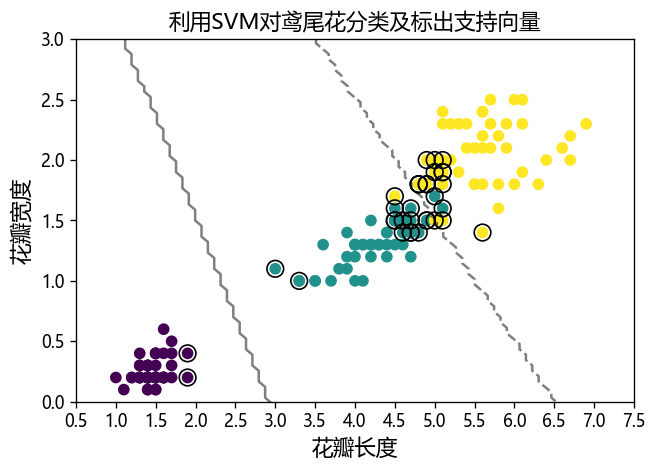

In [455]:
plt.figure(3,dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("利用SVM对鸢尾花分类及标出支持向量", fontsize=13)
plt.xlabel("花瓣长度", fontsize=13)
plt.ylabel("花瓣宽度", fontsize=13)
ax = plt.gca()
ax.set_xlim(0.5,7.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0,3.0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
DecisionBoundaryDisplay.from_estimator(
    clf_2,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
ax.scatter(
    clf_2.support_vectors_[:, 0],
    clf_2.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# 试一试main吧，同时试一试不同的内核分类器

In [470]:
# 读取数据
def read():
    iris = pd.read_csv('../matplotlib learn/data/iris.csv')
    return iris

In [572]:
# 原始数据散点图
def original(str_1, str_2):
    dict = {'萼片长度': 'Sepal.Length','萼片宽度': 'Sepal.Width','花瓣长度': 'Petal.Length','花瓣宽度': 'Petal.Width'}
    feature_1=dict[str_1];
    feature_2=dict[str_2];
    
    x1 = iris[iris['Species'] == 'setosa'][feature_1]
    y1 = iris[iris['Species'] == 'setosa'][feature_2]
    x2 = iris[iris['Species'] == 'versicolor'][feature_1]
    y2 = iris[iris['Species'] == 'versicolor'][feature_2]
    x3 = iris[iris['Species'] == 'virginica'][feature_1]
    y3 = iris[iris['Species'] == 'virginica'][feature_2]
    z1 = np.zeros(50,int)
    z2 = np.ones(50,int)
    z3 = 2*z2
    plt.figure(1,dpi=120)
    plt.scatter(x1, y1, c=z1, cmap='Purples_r')
    plt.scatter(x2, y2, c=z2, cmap='PuBuGn_r')
    plt.scatter(x3, y3, c=z3, cmap='plasma_r')
    plt.xlabel(str_1, fontsize=13)
    plt.ylabel(str_2, fontsize=13)
    plt.title("iris数据集", fontsize=15)
    plt.show()

In [579]:
# 原始数据散点图
def svm_classifier(str_1, str_2, kernel_choice):
    dict = {'萼片长度': 'Sepal.Length','萼片宽度': 'Sepal.Width','花瓣长度': 'Petal.Length','花瓣宽度': 'Petal.Width'}
    feature_1=dict[str_1];
    feature_2=dict[str_2];
    
    x1 = iris[iris['Species'] == 'setosa'][feature_1]
    y1 = iris[iris['Species'] == 'setosa'][feature_2]
    x2 = iris[iris['Species'] == 'versicolor'][feature_1]
    y2 = iris[iris['Species'] == 'versicolor'][feature_2]
    x3 = iris[iris['Species'] == 'virginica'][feature_1]
    y3 = iris[iris['Species'] == 'virginica'][feature_2]
    z1 = np.zeros(50,int)
    z2 = np.ones(50,int)
    z3 = 2*z2
    
    # 将两个特征合并成二维数组
    X1 = np.column_stack((x1, y1))  # 水平合并
    X2 = np.column_stack((x2, y2))
    X3 = np.column_stack((x3, y3))
    X = np.concatenate((X1, X2, X3), axis = 0)  # 垂直合并
    # y合并
    z = [z1,z2,z3]
    tmp = tuple(z)
    y = np.hstack(z)
    
    # 定义分类器
    clf = svm.SVC(kernel=kernel_choice, C=1)
    clf.fit(X, y)
    
    plt.figure(2,dpi=120)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("利用SVM的%s对鸢尾花分类及标出支持向量"%kernel_choice, fontsize=13)
    plt.xlabel(str_1, fontsize=13)
    plt.ylabel(str_2, fontsize=13)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax = plt.gca()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()  # 第0列的范围
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()  # 第1列的范围
    ax.set_xlim(x1_min-0.3, x1_max+0.3)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.set_ylim(x2_min-0.3, x2_max+0.3)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax,
    )
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.show()

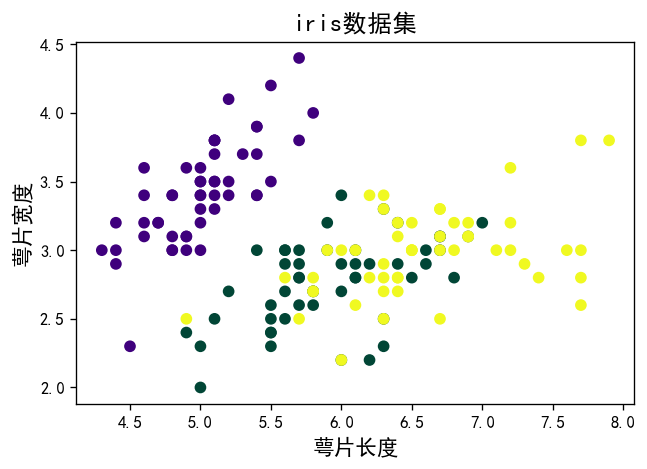

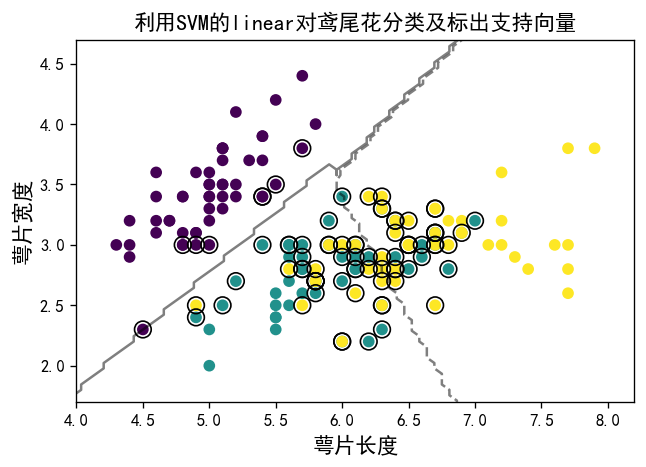

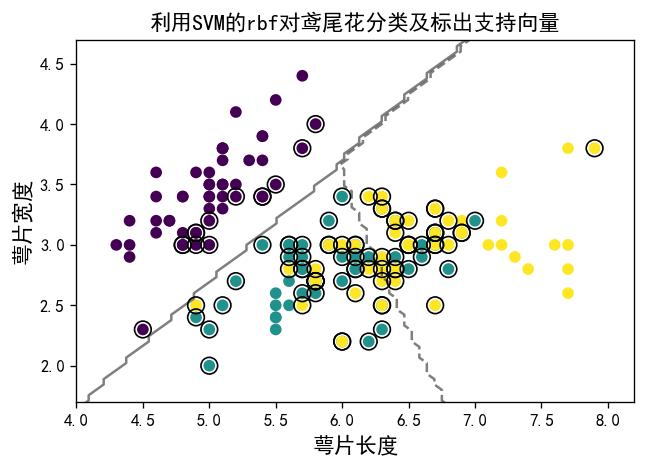

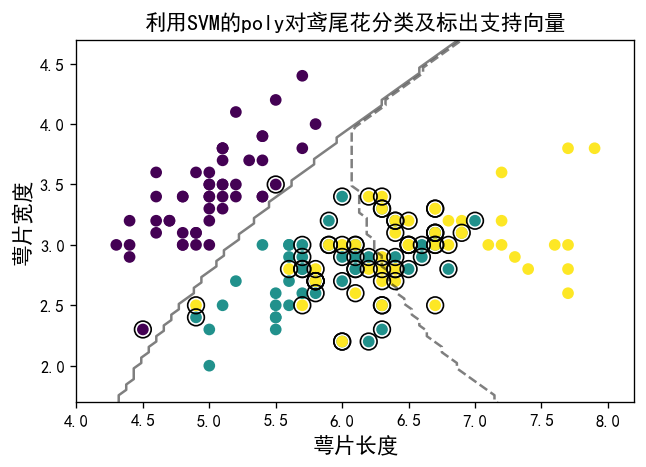

In [580]:
if __name__=="__main__":
    read()
    original('萼片长度','萼片宽度')
    svm_classifier('萼片长度','萼片宽度','linear')
    svm_classifier('萼片长度','萼片宽度','rbf')
    svm_classifier('萼片长度','萼片宽度','poly')

# 网上一位大佬的机器学习作业代码，借鉴了坐标轴设置漂亮的一丢丢的想法，但他写的比我漂亮多了

In [575]:
def load_data():
    # 导入数据
    data = np.loadtxt('./data/iris.data', dtype=float, delimiter=',', converters={4: iris_type})
    return data


def iris_type(s):
    # 数据转为整型，数据集标签类别由string转为int
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]


# 定义分类器
def classifier():
    clf = svm.SVC(C=0.5,  # 误差项惩罚系数
                  kernel='linear',  # 线性核 kernel="rbf":高斯核
                  decision_function_shape='ovr')  # 决策函数
    return clf


def train(clf, x_train, y_train):
    # x_train：训练数据集
    # y_train：训练数据集标签
    # 训练开始
    # 同flnumpy.ravelatten将矩阵拉平
    clf.fit(x_train, y_train.ravel(), sample_weight=None)


def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s Accuracy:%.3f' % (tip, np.mean(acc)))


def print_accuracy(clf, x_train, y_train, x_test, y_test):
    show_accuracy(clf.predict(x_train), y_train, 'traing data')
    show_accuracy(clf.predict(x_test), y_test, 'testing data')


def draw(clf, x):
    plt.figure(1,dpi=150)
    iris_feature = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围

    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    grid_hat = clf.predict(grid_test)  # 预测分类值 得到【0,0.。。。2,2,2】
    grid_hat = grid_hat.reshape(x1.shape)  # reshape grid_hat和x1形状一致

    # 指定默认的字体
    mpl.rcParams['font.sans-serif'] = ['SimHei']

    # 设置颜色
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'b', 'r'])


    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light) # 预测值的显示
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolor='k', s=30, cmap=cm_dark)  # 样本点
    plt.scatter(x_test[:, 0], x_test[:, 1], s=30, facecolor='none', zorder=10)  # 测试点
    plt.xlabel(iris_feature[0], fontsize=13)
    plt.ylabel(iris_feature[1], fontsize=13)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    plt.title("SVM对鸢尾花分类")
    plt.show()


traing data Accuracy:0.981
testing data Accuracy:0.978
traing data Accuracy:0.819
testing data Accuracy:0.778


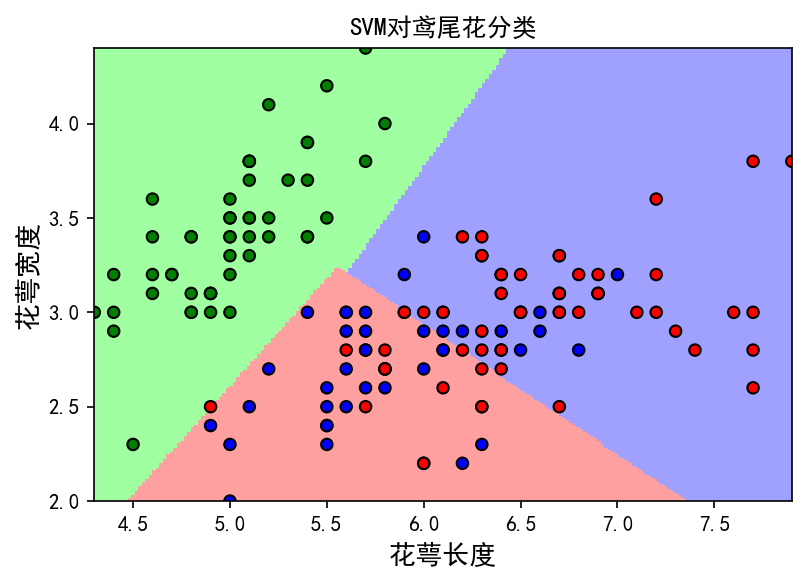

In [576]:
data = load_data()
x, y = np.split(data, (4,), axis=1)  # x为前四列，y为第五列，x为训练数据，y为数据标签

# x_train,x_test,y_train,y_test = 训练数据，测试数据，训练数据标签，测试数据标签
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1,
                                                                    test_size=0.3)  # 数据集划分成70%30%测试集
clf = classifier()  # 声明svm分类器对象
train(clf, x_train, y_train)  # 启动分类器进行模型训练
print_accuracy(clf, x_train, y_train, x_test, y_test)

# 训练两个特征（用于画图展示）
data = load_data()
x, y = np.split(data, (4,), axis=1)  # x为前四列，y为第五列，x为训练数据，y为数据标签
x = x[:, :2]  # 只要前两个特征，此时只训练前两个特征，用于画图
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, random_state=1, test_size=0.3)
clf = classifier()
train(clf, x_train, y_train)
print_accuracy(clf, x_train, y_train, x_test, y_test)
draw(clf, x)